# Credit Card Default Prediction

# Datset
https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?select=UCI_Credit_Card.csv
https://www.kaggle.com/code/muskanbhasin/credit-card-default-prediction
Original Datasets
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#
https://archive.ics.uci.edu/ml/machine-learning-databases/00350/

In [1]:
train_file_path =r"C:\project\Credit card prediction\CreditCard\artifact\data_ingestion\2022-12-20-20-31-13\ingested_data\train\UCI_Credit_Card.csv"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [3]:
df= pd.read_csv(train_file_path)

In [4]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,23999.0,20000.0,1.0,5.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,-2.0,20564.0,20284.0,19394.0,39950.0,0.0,0.0,3055.0,1467.0,1096.0,1000.0,0.0,0.0,0.0
1,419.0,50000.0,1.0,2.0,1.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,44338.0,43048.0,35639.0,18753.0,19091.0,19548.0,3629.0,3332.0,2000.0,2000.0,2000.0,2500.0,0.0
2,8001.0,30000.0,1.0,2.0,1.0,62.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,11188.0,2990.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(22500, 25)

# Profiling of data

1)No.of columns

In [6]:
df.columns.to_list()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default']

2)Null value

In [7]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

Conclusion:-We have no null value

3) Checking out duplicate values

In [8]:
df.duplicated().sum()

0

Conclusion:-No duplicate found

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,22500.0,15011.430800,8656.046374,1.0,7526.75,14975.0,22503.25,30000.0
LIMIT_BAL,22500.0,167322.488889,129877.100895,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,22500.0,1.606978,0.488433,1.0,1.00,2.0,2.00,2.0
EDUCATION,22500.0,1.854089,0.791752,0.0,1.00,2.0,2.00,6.0
MARRIAGE,22500.0,1.554444,0.521135,0.0,1.00,2.0,2.00,3.0
AGE,22500.0,35.483378,9.237306,21.0,28.00,34.0,41.00,79.0
PAY_0,22500.0,-0.017333,1.130045,-2.0,-1.00,0.0,0.00,8.0
PAY_2,22500.0,-0.133289,1.201420,-2.0,-1.00,0.0,0.00,8.0
PAY_3,22500.0,-0.168889,1.198215,-2.0,-1.00,0.0,0.00,8.0
PAY_4,22500.0,-0.223956,1.168320,-2.0,-1.00,0.0,0.00,8.0


# Data Cleaning

In [10]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [11]:
df['SEX'].value_counts()

2.0    13657
1.0     8843
Name: SEX, dtype: int64

In [12]:
df['EDUCATION'].value_counts()

2.0    10523
1.0     7930
3.0     3690
5.0      211
4.0       94
6.0       40
0.0       12
Name: EDUCATION, dtype: int64

In [13]:
fil=(df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2.0    10523
1.0     7930
3.0     3690
4.0      357
Name: EDUCATION, dtype: int64

In [14]:
df['MARRIAGE'].value_counts()

2.0    12031
1.0    10193
3.0      240
0.0       36
Name: MARRIAGE, dtype: int64

In [15]:
summation = df['MARRIAGE']==0
df.loc[summation,'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2.0    12031
1.0    10193
3.0      276
Name: MARRIAGE, dtype: int64

In [16]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,23999.0,20000.0,1.0,4.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,-2.0,20564.0,20284.0,19394.0,39950.0,0.0,0.0,3055.0,1467.0,1096.0,1000.0,0.0,0.0,0.0
1,419.0,50000.0,1.0,2.0,1.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,44338.0,43048.0,35639.0,18753.0,19091.0,19548.0,3629.0,3332.0,2000.0,2000.0,2000.0,2500.0,0.0
2,8001.0,30000.0,1.0,2.0,1.0,62.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,11188.0,2990.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18258.0,210000.0,1.0,2.0,1.0,66.0,-1.0,2.0,-1.0,-1.0,-1.0,0.0,780.0,390.0,390.0,390.0,780.0,390.0,0.0,780.0,390.0,780.0,0.0,390.0,1.0
4,14973.0,150000.0,2.0,1.0,2.0,28.0,0.0,0.0,-1.0,4.0,3.0,2.0,8982.0,0.0,1187.0,1182.0,882.0,441.0,0.0,1187.0,0.0,0.0,0.0,583.0,0.0


In [17]:
df.shape

(22500, 25)

In [18]:
df['AGE'].unique()

array([26., 48., 62., 66., 28., 46., 30., 25., 40., 47., 37., 33., 53.,
       27., 39., 29., 44., 32., 52., 43., 55., 31., 34., 38., 35., 41.,
       57., 50., 56., 23., 36., 24., 22., 42., 49., 21., 51., 45., 59.,
       54., 60., 63., 65., 58., 64., 67., 61., 72., 70., 73., 69., 79.,
       68., 75., 71.])

In [19]:
df1= df.copy()

# Univariant Analysis

<AxesSubplot:xlabel='AGE', ylabel='Count'>

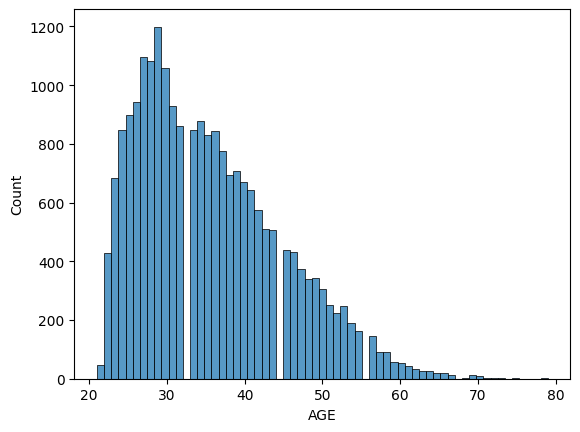

In [20]:
sns.histplot(x='AGE',data=df1)

In probability density function(pdf) also majority of age group buying credit card is within range 30-40

It is a log normal distribution

<AxesSubplot:ylabel='count'>

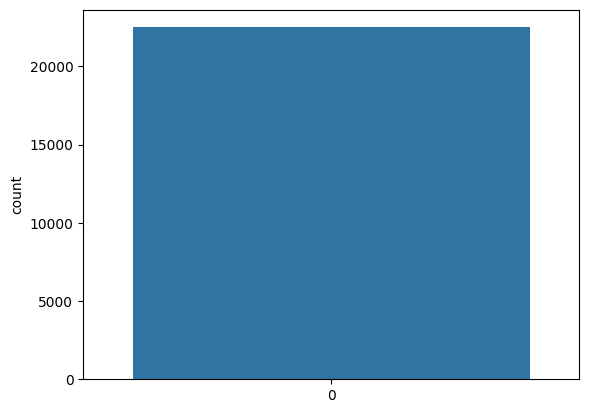

In [21]:
sns.countplot(df1['SEX'])

<AxesSubplot:ylabel='MARRIAGE'>

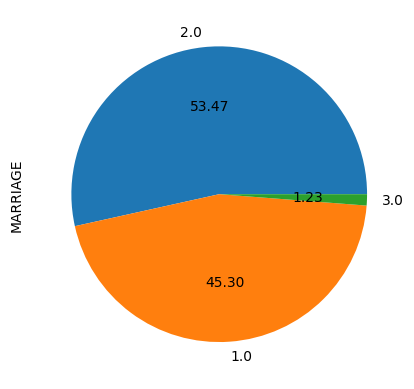

In [22]:
df1['MARRIAGE'].value_counts().plot(kind='pie',autopct="%.2f")

More no.of singles are issuing cedit card

<AxesSubplot:ylabel='EDUCATION'>

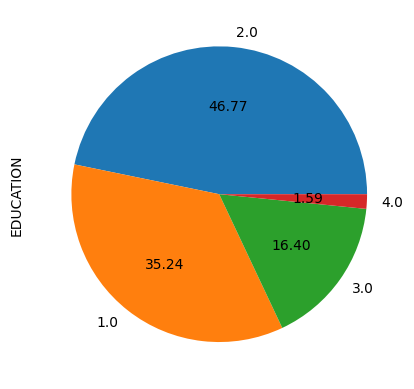

In [23]:
df1['EDUCATION'].value_counts().plot(kind='pie',autopct="%.2f")

more no of university students are issuing credit card

# Bivariant Analysis

In [24]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

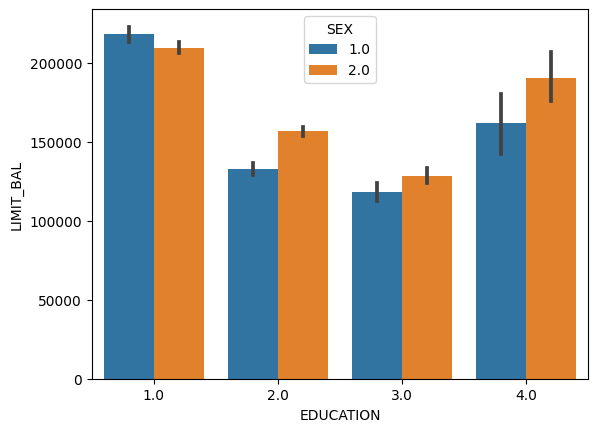

In [25]:
#sns.barplot(df1['EDUCATION'],df1['LIMIT_BAL'],hue=df1['SEX'])
sns.barplot(data=df1,x='EDUCATION',y='LIMIT_BAL',hue='SEX')

Conclusion:-
    1)Male graduate school students are given more credit
    

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

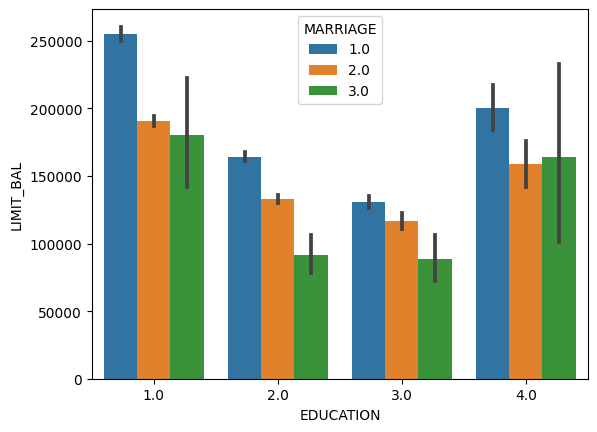

In [26]:
sns.barplot(data=df1,x='EDUCATION',y='LIMIT_BAL',hue='MARRIAGE')

In [27]:
pd.crosstab(df1['EDUCATION'],df1['MARRIAGE'])

MARRIAGE,1.0,2.0,3.0
EDUCATION,,,
1.0,2787,5103,40
2.0,5085,5317,121
3.0,2144,1439,107
4.0,177,172,8


<AxesSubplot:xlabel='MARRIAGE', ylabel='EDUCATION'>

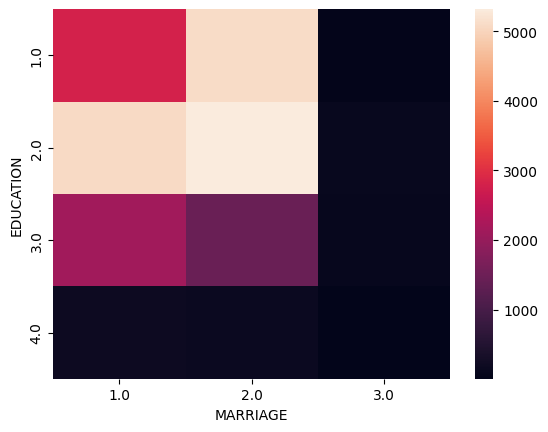

In [28]:
sns.heatmap(pd.crosstab(df1['EDUCATION'],df1['MARRIAGE']))

In [29]:
correlation = df1.corr()

In [30]:
print(correlation['EDUCATION'].sort_values(ascending = False),'\n')

EDUCATION    1.000000
AGE          0.180875
PAY_2        0.127630
PAY_3        0.119733
PAY_4        0.112578
PAY_0        0.111671
PAY_5        0.099484
PAY_6        0.080801
ID           0.042017
default      0.030320
BILL_AMT1    0.015770
BILL_AMT2    0.011248
SEX          0.011137
BILL_AMT3    0.005503
BILL_AMT4   -0.007522
BILL_AMT5   -0.012372
BILL_AMT6   -0.014237
PAY_AMT2    -0.031140
PAY_AMT4    -0.038489
PAY_AMT1    -0.041354
PAY_AMT3    -0.043800
PAY_AMT6    -0.045825
PAY_AMT5    -0.048303
MARRIAGE    -0.135421
LIMIT_BAL   -0.235542
Name: EDUCATION, dtype: float64 



In [31]:
df2= df1.copy()

In [32]:
df2.drop(['ID'],axis=1,inplace=True)

In [33]:
correlation = df2.corr()

In [34]:
correlation

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.033220,-0.235542,-0.113726,0.149655,-0.274752,-0.298723,-0.287865,-0.269000,-0.251536,-0.235487,0.286739,0.280638,0.283760,0.293909,0.293945,0.288666,0.210404,0.180342,0.217979,0.203569,0.215015,0.220478,-0.160081
SEX,0.033220,1.000000,0.011137,-0.032966,-0.088261,-0.062672,-0.071173,-0.066488,-0.058528,-0.054592,-0.040692,-0.034945,-0.033004,-0.024227,-0.023747,-0.015464,-0.015659,-0.006527,-0.001830,-0.012491,0.004189,0.000613,-0.003484,-0.041438
EDUCATION,-0.235542,0.011137,1.000000,-0.135421,0.180875,0.111671,0.127630,0.119733,0.112578,0.099484,0.080801,0.015770,0.011248,0.005503,-0.007522,-0.012372,-0.014237,-0.041354,-0.031140,-0.043800,-0.038489,-0.048303,-0.045825,0.030320
MARRIAGE,-0.113726,-0.032966,-0.135421,1.000000,-0.413216,0.023504,0.028579,0.037060,0.036466,0.035941,0.033578,-0.028282,-0.025550,-0.030024,-0.028278,-0.029563,-0.026298,-0.010904,-0.016526,-0.011288,-0.012861,-0.002740,-0.010763,-0.027001
AGE,0.149655,-0.088261,0.180875,-0.413216,1.000000,-0.044327,-0.058093,-0.058633,-0.055793,-0.062357,-0.056669,0.053719,0.052157,0.051793,0.048104,0.045311,0.045030,0.028003,0.022202,0.028515,0.019057,0.022228,0.017431,0.012483
PAY_0,-0.274752,-0.062672,0.111671,0.023504,-0.044327,1.000000,0.674133,0.577596,0.540986,0.510705,0.477141,0.185249,0.189209,0.178474,0.179103,0.181534,0.176810,-0.080583,-0.072583,-0.071317,-0.064623,-0.058941,-0.059221,0.328730
PAY_2,-0.298723,-0.071173,0.127630,0.028579,-0.058093,0.674133,1.000000,0.767106,0.662001,0.623243,0.575739,0.231259,0.232902,0.220859,0.220114,0.219602,0.217105,-0.084008,-0.063598,-0.057689,-0.047436,-0.039018,-0.035646,0.269259
PAY_3,-0.287865,-0.066488,0.119733,0.037060,-0.058633,0.577596,0.767106,1.000000,0.776185,0.688392,0.635639,0.206247,0.235893,0.224821,0.225801,0.224244,0.219698,0.002384,-0.071435,-0.052216,-0.044579,-0.038286,-0.035849,0.239384
PAY_4,-0.269000,-0.058528,0.112578,0.036466,-0.055793,0.540986,0.662001,0.776185,1.000000,0.823014,0.720578,0.201533,0.225545,0.244582,0.247546,0.244348,0.239103,-0.007825,-0.000594,-0.068160,-0.042754,-0.034970,-0.023230,0.218366
PAY_5,-0.251536,-0.054592,0.099484,0.035941,-0.062357,0.510705,0.623243,0.688392,0.823014,1.000000,0.820150,0.204067,0.225591,0.241733,0.272422,0.270708,0.262568,-0.004601,-0.005021,0.010929,-0.056773,-0.034168,-0.019748,0.205260


# Plotting heat Map for getting correlation

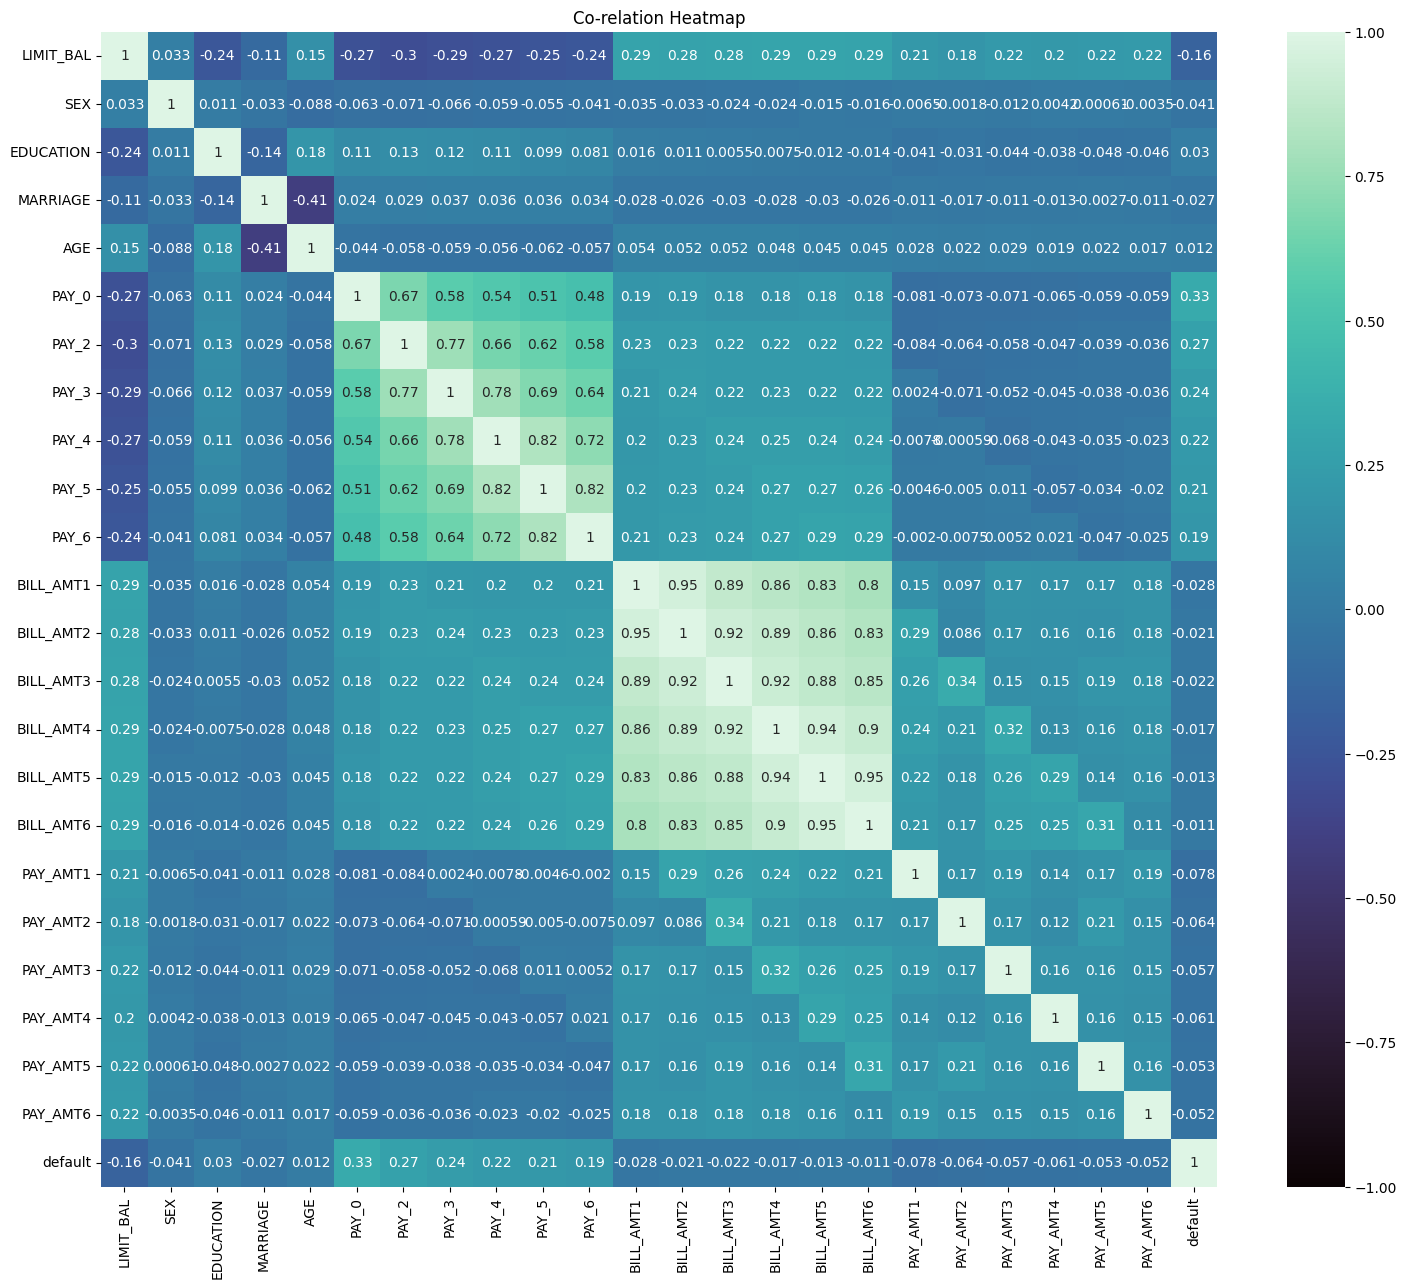

In [35]:
corr1 = df2.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation, annot=True, vmin=-1.0, cmap='mako')
plt.title('Co-relation Heatmap')
plt.show()

<AxesSubplot:xlabel='default', ylabel='LIMIT_BAL'>

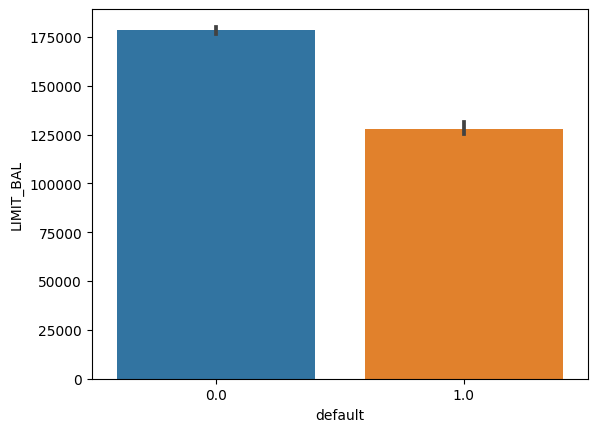

In [36]:
#sns.barplot(df2['default'],df2['LIMIT_BAL'])
sns.barplot(data=df2,x='default',y='LIMIT_BAL')

<AxesSubplot:xlabel='EDUCATION', ylabel='default'>

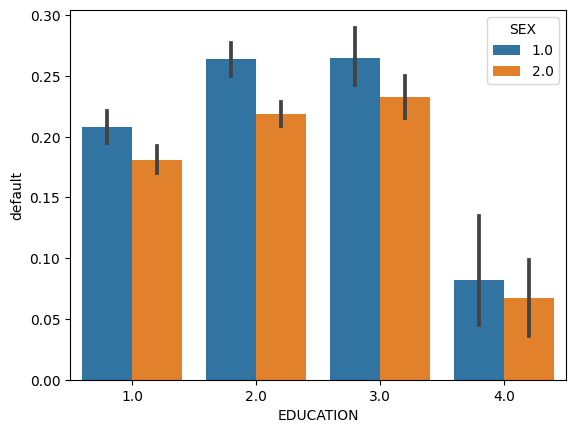

In [37]:
#sns.barplot(df2['EDUCATION'],df2['default'],hue=df2['SEX'])
sns.barplot(data=df2,x='EDUCATION',y='default',hue='SEX')

<AxesSubplot:ylabel='count'>

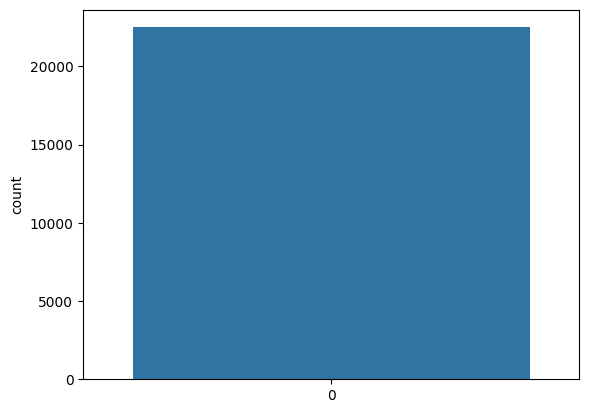

In [38]:
sns.countplot(df2['default'])

<AxesSubplot:xlabel='MARRIAGE', ylabel='default'>

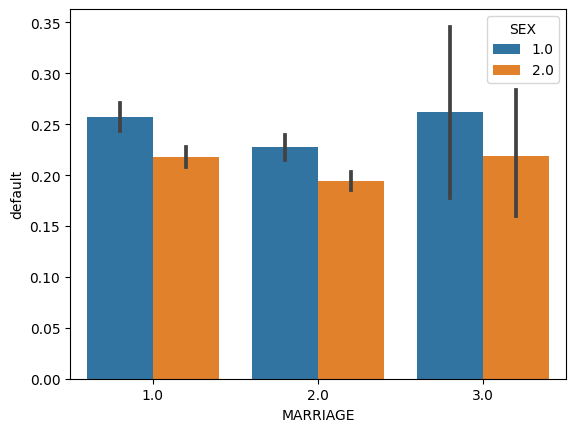

In [39]:
sns.barplot(data=df2,x='MARRIAGE',y='default',hue='SEX')

In [40]:
df2.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,1.0,4.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,-2.0,20564.0,20284.0,19394.0,39950.0,0.0,0.0,3055.0,1467.0,1096.0,1000.0,0.0,0.0,0.0
1,50000.0,1.0,2.0,1.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,44338.0,43048.0,35639.0,18753.0,19091.0,19548.0,3629.0,3332.0,2000.0,2000.0,2000.0,2500.0,0.0
2,30000.0,1.0,2.0,1.0,62.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,11188.0,2990.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df2.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df2.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df2.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [42]:
df2.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,20000.0,1.0,4.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,-2.0,20564.0,20284.0,19394.0,39950.0,0.0,0.0,3055.0,1467.0,1096.0,1000.0,0.0,0.0,0.0
1,50000.0,1.0,2.0,1.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,44338.0,43048.0,35639.0,18753.0,19091.0,19548.0,3629.0,3332.0,2000.0,2000.0,2000.0,2500.0,0.0
2,30000.0,1.0,2.0,1.0,62.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,11188.0,2990.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
bill_amount = df2[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]

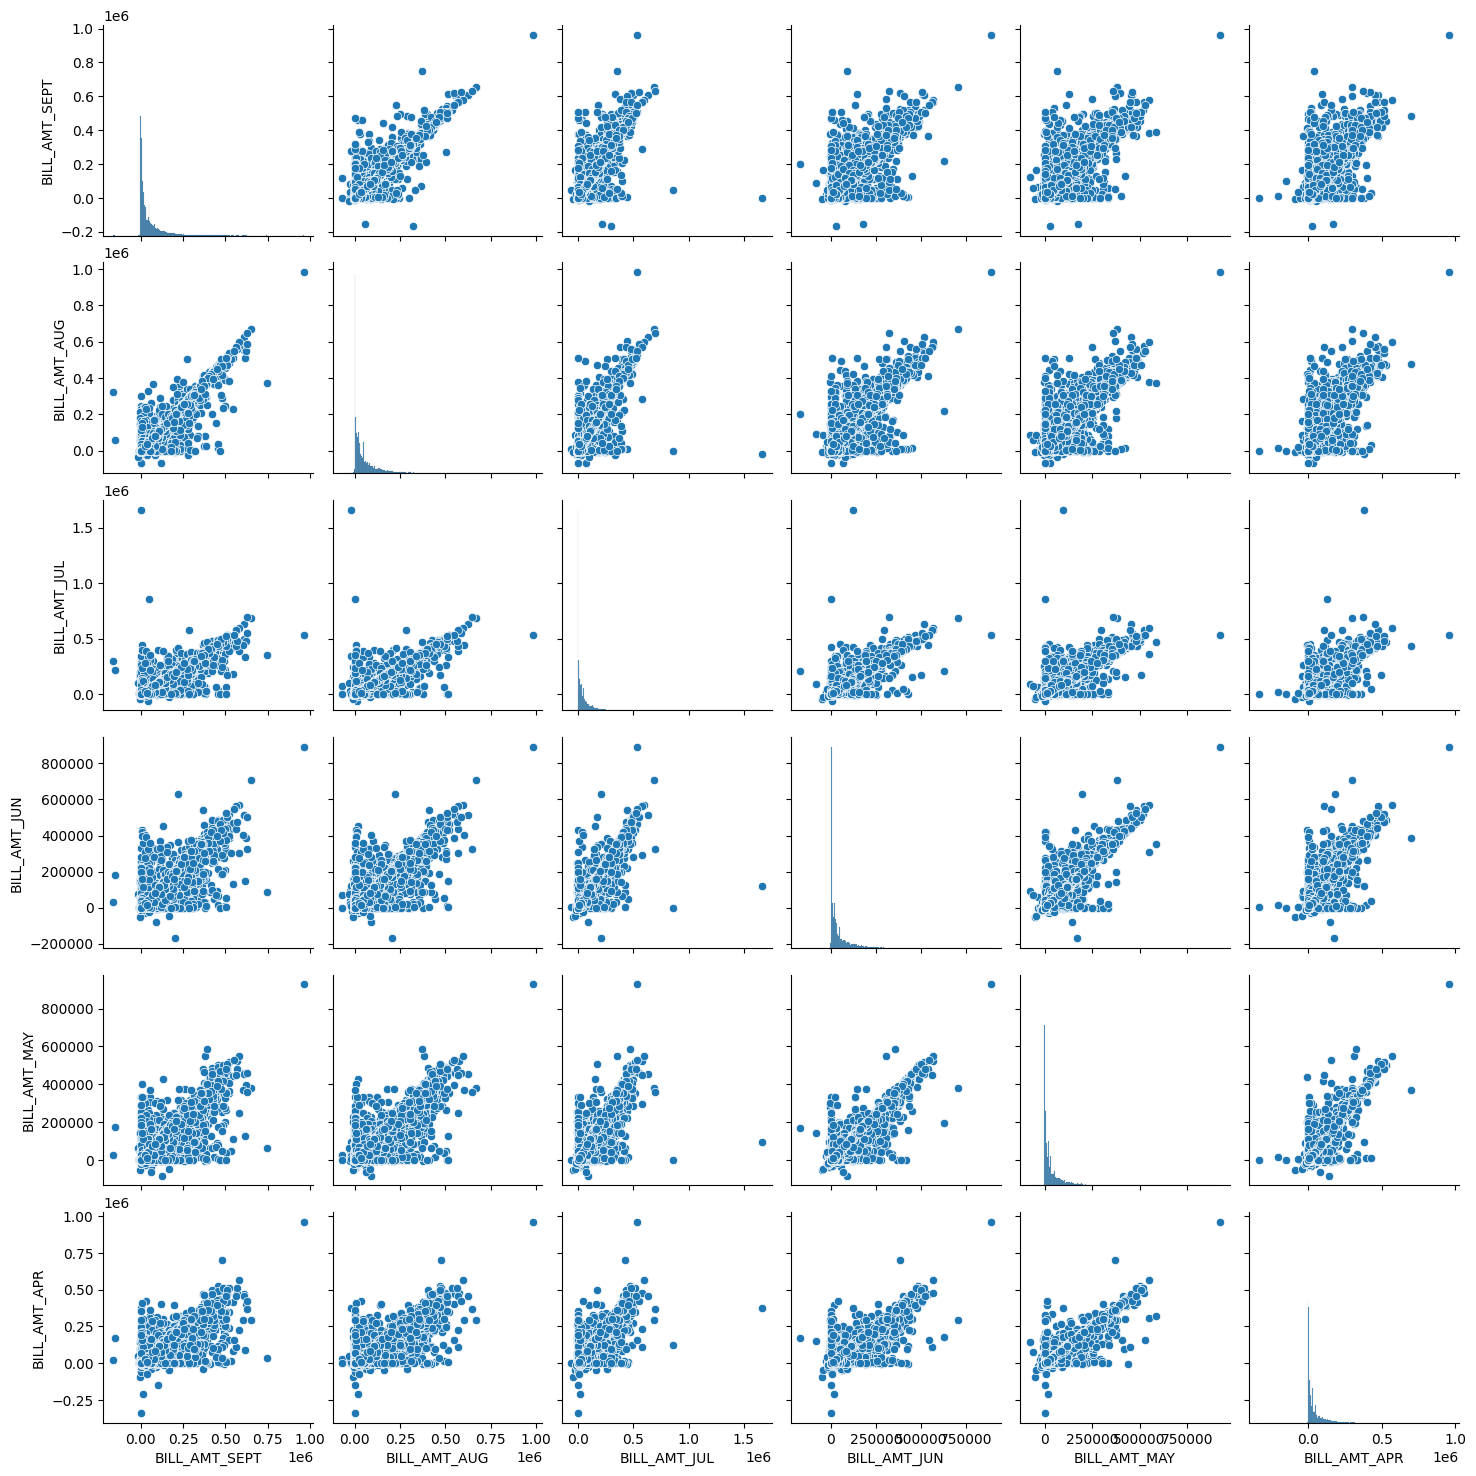

In [44]:
sns.pairplot(bill_amount)

In [45]:
df3 = df2.copy()

In [46]:
df3.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,20000.0,1.0,4.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,-2.0,20564.0,20284.0,19394.0,39950.0,0.0,0.0,3055.0,1467.0,1096.0,1000.0,0.0,0.0,0.0
1,50000.0,1.0,2.0,1.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,44338.0,43048.0,35639.0,18753.0,19091.0,19548.0,3629.0,3332.0,2000.0,2000.0,2000.0,2500.0,0.0
2,30000.0,1.0,2.0,1.0,62.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,11188.0,2990.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
x,y =df3.drop(columns=['default'],axis=1),df3['default']

In [48]:
x.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,20000.0,1.0,4.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,-2.0,20564.0,20284.0,19394.0,39950.0,0.0,0.0,3055.0,1467.0,1096.0,1000.0,0.0,0.0
1,50000.0,1.0,2.0,1.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,44338.0,43048.0,35639.0,18753.0,19091.0,19548.0,3629.0,3332.0,2000.0,2000.0,2000.0,2500.0
2,30000.0,1.0,2.0,1.0,62.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,11188.0,2990.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer 

In [71]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(x, y)


In [51]:
#df4 = X_SMOTE.append(y_SMOTE,sort=False)

In [52]:
#df4.shape

In [53]:
num_pipeline = Pipeline(steps=[
('imputer',SimpleImputer(strategy="median")),
('scaling',StandardScaler())
])

In [54]:
#df4.columns

In [55]:
num_column_names = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'default']

In [56]:
preprocessing = ColumnTransformer(
    transformers=[('num_pipeline',num_pipeline,num_column_names)]
)

In [57]:
train_df = preprocessing.fit_transform(df3)

In [58]:
train_df.shape

(22500, 24)

In [59]:
x = train_df

In [60]:
y = np.array(df3.default)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr=LinearRegression()

In [63]:
lr.fit(x,y)

LinearRegression()

In [64]:
lr.fit_intercept

True

In [65]:
lr.coef_

array([-1.68532472e-16, -1.04083409e-16,  3.26235976e-16, -3.39298058e-17,
        1.22648097e-16, -8.60492502e-17,  5.39740782e-17, -4.37264777e-17,
       -5.11876880e-17,  3.30136929e-16,  7.23582949e-17, -5.90247280e-17,
       -2.68076979e-17, -2.73632336e-16, -3.49876400e-17,  8.06466505e-17,
        4.79627962e-17, -8.84708973e-17,  1.85615412e-16, -2.42861287e-17,
       -6.76542156e-17, -9.71445147e-17, -1.45716772e-16,  4.13794904e-01])

In [66]:
y_hat = lr.predict(x)

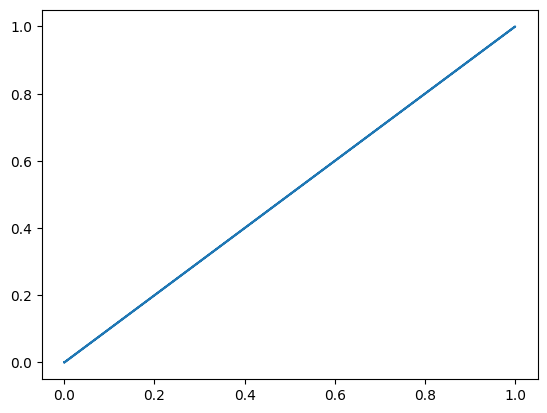

In [67]:
plt.plot(y,y_hat)

In [68]:
from sklearn.metrics import r2_score

In [69]:
r2_score(y,y_hat)

1.0